# dsaoijdasoidasjdaosidj
**dadsa**
\\adssasda\\
* asdasda

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("winequality-red.csv")#this is the dataset from the wine website I used for is quality

In [3]:
df.head()#this indicates the dataset for the first 5

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df['quality']=df['quality'].map(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [7]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [8]:
df.quality

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: object

In [9]:
df['quality'] = df['quality'].apply(lambda x: '3-4' if ('3' in x or '4' in x) else x)
df['quality'] = df['quality'].apply(lambda x: '5-6' if ('5' in x or '6' in x) else x)
df['quality'] = df['quality'].apply(lambda x: '7-8' if ('7' in x or '8' in x) else x)
df['quality'].value_counts()#this forces all the categories of number qualities like 3 and 4 into one category 3-4 and counts

5-6    1319
7-8     217
3-4      63
Name: quality, dtype: int64

In [10]:
x = df.drop("quality", axis=1)
y = df["quality"]
x_train,x_test,y_train , y_test = train_test_split (x , y )#this is properly splits the data

In [11]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)#I concooperated this so that the program would not misread predicting and reading

In [12]:
model1 = LogisticRegression(multi_class='auto').fit(x_train, y_train)# this uses the algorithm LogReg

In [13]:
y_hat_test=model1.predict(x_test)
y_hat_train= model1.predict(x_train)#this sets up the variable for prediciting outcomes

In [14]:
residuals = y_train == y_hat_train
print('Number of values correctly predicted:')
print(pd.Series(residuals).value_counts()) # this counts how many predicted were true and false using LogReg.

Number of values correctly predicted:
True     1011
False     188
Name: quality, dtype: int64


In [15]:
residuals = y_test == y_hat_test
print('Number of values correctly predicted: ')
print(pd.Series(residuals).value_counts())# this counts how many predicted were true and false using LogReg.

Number of values correctly predicted: 
True     337
False     63
Name: quality, dtype: int64


In [16]:
accuracy_score(y_train, y_hat_train)#this calculated accuracy of the algorithm

0.8432026688907422

In [17]:
accuracy_score(y_test, y_hat_test)#this calculated accuracy of the algorithm

0.8425

<Figure size 720x720 with 0 Axes>

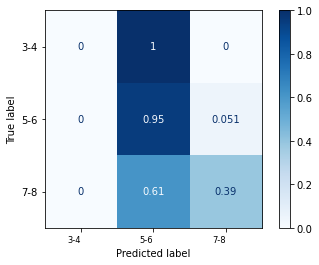

In [18]:
plt.figure(figsize =(10,10))
plot_confusion_matrix(model1, x_test, y_test,cmap=plt.cm.Blues,normalize='true')
plt.xticks(horizontalalignment='right', fontsize='small')
plt.show() #this writes the matrix of the accuracy

In [19]:
model2 = DecisionTreeClassifier().fit(x_train, y_train)# this uses the algorithm DecisionTree

In [20]:
y_hat_test=model2.predict(x_test)
y_hat_train= model2.predict(x_train)#this sets up the variable for prediciting outcomes

In [21]:
residuals = y_train == y_hat_train
print('Number of values correctly predicted:')
print(pd.Series(residuals).value_counts())# this counts how many predicted were true and false using DecisionTree.

Number of values correctly predicted:
True    1199
Name: quality, dtype: int64


In [22]:
residuals = y_test == y_hat_test
print('Number of values correctly predicted: ')
print(pd.Series(residuals).value_counts())# this counts how many predicted were true and false using DecisionTree.

Number of values correctly predicted: 
True     335
False     65
Name: quality, dtype: int64


In [23]:
accuracy_score(y_train, y_hat_train)#this calculated accuracy of the algorithm

1.0

In [24]:
accuracy_score(y_test, y_hat_test)#this calculated accuracy of the algorithm

0.8375

<Figure size 720x720 with 0 Axes>

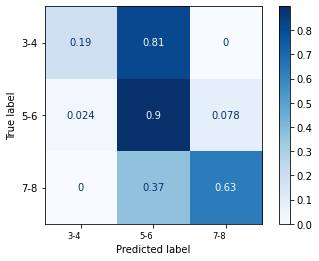

In [25]:
plt.figure(figsize =(10,10))
plot_confusion_matrix(model2, x_test, y_test, cmap=plt.cm.Blues,normalize='true')
plt.xticks(horizontalalignment='right', fontsize='small')
plt.show()#this writes the matrix of the accuracy

In [26]:
model3 = KNeighborsClassifier().fit(x_train, y_train)

In [27]:
y_hat_test=model3.predict(x_test)
y_hat_train= model3.predict(x_train)#this sets up the variable for prediciting outcomes

In [28]:
residuals = y_train == y_hat_train
print('Number of values correctly predicted:')
print(pd.Series(residuals).value_counts())# this counts how many predicted were true and false using Kneighbor

Number of values correctly predicted:
True     1044
False     155
Name: quality, dtype: int64


In [29]:
residuals = y_test == y_hat_test
print('Number of values correctly predicted: ')
print(pd.Series(residuals).value_counts())# this counts how many predicted were true and false using Kneighbor.

Number of values correctly predicted: 
True     338
False     62
Name: quality, dtype: int64


In [30]:
accuracy_score(y_train, y_hat_train)#this calculated accuracy of the algorithm

0.8707256046705588

In [31]:
accuracy_score(y_test, y_hat_test)#this calculated accuracy of the algorithm

0.845

<Figure size 720x720 with 0 Axes>

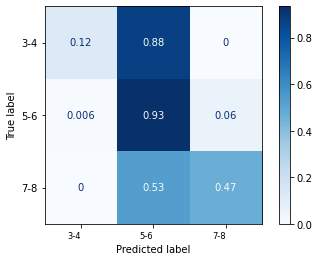

In [32]:
plt.figure(figsize =(10,10))
plot_confusion_matrix(model3, x_test, y_test,cmap=plt.cm.Blues,normalize='true')
plt.xticks(horizontalalignment='right', fontsize='small')
plt.show()#this writes the matrix of the accuracy